---
### Подготовка

Импорт библиотек (в практике из учебника *O'Reilly "Введение в машинное обучение с помощью Python"*)

In [1]:
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display
plt.rc('font', family='Verdana')

<br />
Подготовка данных из задания

In [2]:
x = [56, 43, 74, 64, 136, 64, -14, 74, 45, 71, 54, 19, 4, 50, 2, 69, 89, 47, 41, 54]
xnp = np.array(x)
y = [238, 129, 180, 205, 245, 177, 81, 128, 192, 160, 197, 181, 181, 181, 217, 136, 158, 298, 205, 146]
ynp = np.array(y)

### Задание №1 

**А**. Найти среднее, медиану и моду величины X.<br /><br />
Среднее находится путём сложения значений и деления на их количество<br />
Медиана - середина упорядоченного набора<br />
Мода - наиболее часто встречающееся значение

In [3]:
MeanX = np.mean(xnp)
MedianX = np.median(xnp)
ModeX = stat.multimode(xnp)
print(MeanX, '\n', MedianX, '\n', ModeX)

52.1 
 54.0 
 [74, 64, 54]


<br />

**B**. Найти дисперсию Y.<br /><br />

$s^2=\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\overline x)^2$

In [4]:
VarY = np.var(ynp, ddof=1)
VarY

2294.6184210526317

<br />

**C**. Построить график нормального распределения для Х.<br /><br />

$f(x) = \frac{1}{\sqrt{2\pi \sigma}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$

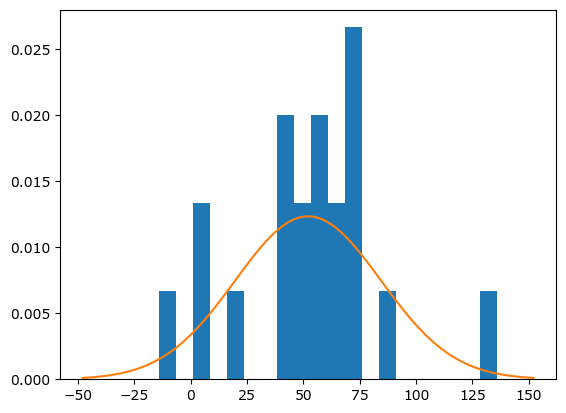

In [5]:
VarX = np.var(xnp)
SkoX = np.sqrt(VarX)

Ox = np.linspace(MeanX-100, MeanX+100, 100) 
Oy = (1 / (SkoX * np.sqrt(2 * np.pi))) * np.exp(-((Ox - MeanX) **2) / (2 * VarX))

plt.hist(xnp, len(xnp), density = True) 
plt.plot(Ox, Oy)

plt.show()

<br />

**D**. Найти вероятность того, что возраст больше 57.<br /><br />

In [6]:
x_sorted = np.sort(x)
p = 0
for i in x_sorted:
    if i <= 57:
        p+=1
    else:
        break
p = len(x) - p
P = p / len(x)
P

0.4

<br />

**E**. Найти двумерное мат. ожидания и ковариационную матрицу для этих двух величин.<br /><br />

Мат. ожидание в этом контексте - оно же среднее. <br />
Ковариация - $cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

In [7]:
MeanY = np.mean(ynp)
MeanXY = np.array([[MeanX], 
                   [MeanY]])
print(MeanXY, '\n')

Cov = np.cov(xnp, ynp, ddof=0)
print(Cov)

[[ 52.1 ]
 [181.75]] 

[[1044.19    347.175 ]
 [ 347.175  2179.8875]]


<br />

**F**. Определить корреляцию между X и Y.<br /><br />

$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$

In [8]:
Cor = stat.correlation(x, y)
print(Cor)

0.23011325665966453


<br />

**G**. Построить диаграмму рассеяния, отображающую зависимость между возрастом и ростом.<br /><br />


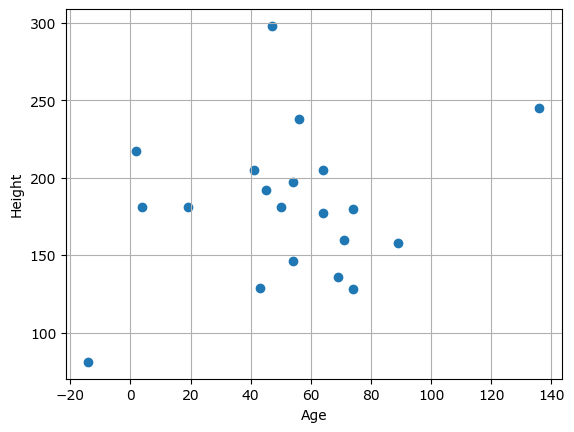

In [9]:
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Height')
plt.grid()

### Задание №2

Рассчитать ковариационную матрицу и 
обобщенную дисперсию для набора данных

In [10]:
dataset = [[15, 2, 41],
       [41, 27, -47],
       [4, 2, 1]]

In [11]:
CovDS = np.cov(dataset, ddof=0)

for i in range(0, len(CovDS)):
    for j in range(0, len(CovDS[1])):
        CovDS[i][j] = float('{:.2f}'.format(CovDS[i][j]))

print(CovDS, '\n')

VarDS = np.linalg.det(CovDS)
print(VarDS)

[[ 262.89 -554.67  -10.11]
 [-554.67 1490.67   40.67]
 [ -10.11   40.67    1.56]] 

322.5526740000019


### Задание №3 

Даны два одномерных нормальных распределения N<sub>a</sub>
и N<sub>b</sub> с мат. ожиданиями 5, 4 и
СКО 1, 5 соответственно. <br /><br />
**А**. Для каждого из значений *{2, 7, 10}* определите, 
    какое из распределений сгенерировало значение с 
    большей вероятностью.
 

In [12]:
MXa = 5
MXb = 4
SKOa = 1
SKOb = 5
dataset = [2, 7, 10]

distA = stat.NormalDist(MXa, SKOa)
distB = stat.NormalDist(MXb, SKOb)

PROBa = []
PROBb = []

for i in dataset:
    PROBa.append(distA.pdf(i))
    PROBb.append(distB.pdf(i))

count = 0
while count<3:
    print('А сгенерировало', dataset[count], 'с вероятностью =', np.round(PROBa[count], 5))
    print('B сгенерировало', dataset[count], 'c вероятностью =', np.round(PROBb[count], 5))
    print('Выше вероятность у распределения', 'A' if PROBa[count] > PROBb[count] else 'B', '\n')
    count += 1

А сгенерировало 2 с вероятностью = 0.00443
B сгенерировало 2 c вероятностью = 0.07365
Выше вероятность у распределения B 

А сгенерировало 7 с вероятностью = 0.05399
B сгенерировало 7 c вероятностью = 0.06664
Выше вероятность у распределения B 

А сгенерировало 10 с вероятностью = 0.0
B сгенерировало 10 c вероятностью = 0.03884
Выше вероятность у распределения B 



<br />

**B**. Найдите значение, которой могло быть сгенерировано обеими распределениями с равной вероятностью.<br /><br />

Нормальное распределение: <br />
$f(x) = \frac{1}{\sqrt{2\pi \sigma}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$

In [13]:
def f(a, b, n):
    ce = (a + b)/2
    while(abs(b - a) > 2*n):
        if((distA.pdf(ce) - distB.pdf(ce))*(distA.pdf(a) - distB.pdf(a)) > 0):
            a = ce;
        else:
            b = ce;
        ce = (a + b) / 2;
    return ce;

print(f(0, 2, 1e-3), '\n' ,f(2, 8, 1e-3))

1.9990234375 
 3.198974609375


---
### Вывод

В процессе выполнения практической работы были получены навыки использования библиотек Python, среды Jupyter Notebook и языка разметки Markdown (и TeX) для базовой обработки данных, их анализа и визуализации. Изучены методы numpy, pandas и statistics для решения задач случайных величин, методы matplotlib для работы с графиками.